In [2]:
import numpy as np
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image

In [10]:
class BMITState(TypedDict):
    height: float
    weight: float
    bmi: float
    category: str

In [11]:
def bmi_calculator(state: BMITState) -> BMITState:
    state["bmi"] = state["weight"] / (state["height"] ** 2)
    return state

def categorize_bmi(state: BMITState) -> BMITState:
    if state["bmi"] < 18.5:
        state["category"] = "underweight"
    elif state["bmi"] < 25:
        state["category"] = "normal"
    elif state["bmi"] < 30:
        state["category"] = "overweight"
    else:
        state["category"] = "obese"
    return state

In [12]:
# state graph
graph = StateGraph(BMITState)

# add nodes
graph.add_node("bmi_calculator", bmi_calculator)
graph.add_node("label_bmi", categorize_bmi)

# add edges
graph.add_edge(START, "bmi_calculator")
graph.add_edge("bmi_calculator", "label_bmi")
graph.add_edge("label_bmi", END)

#  compile graph
workflow = graph.compile()

**workflow visualization**
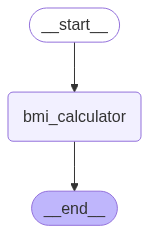

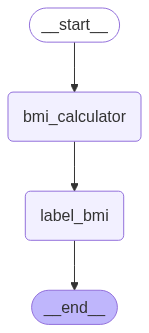

In [13]:
#  visualize workflow
Image(workflow.get_graph().draw_mermaid_png())

In [14]:
initial_state = {"height": 1.8, "weight": 80}
final_state = workflow.invoke(initial_state)
final_state

{'height': 1.8, 'weight': 80, 'bmi': 24.691358024691358, 'category': 'normal'}